In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Data
df = pd.read_csv(r'C://Users/Utente/Desktop/BACKUP/DA/Excel/csv/menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [2]:
df['Category'].unique()
#There's 9 categories
len(df['Item'].unique())
#There's 260 products

260

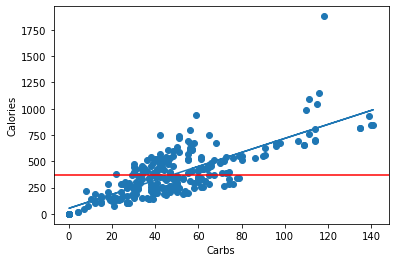

In [3]:
#Correlation between Carbs and Calories
x=df['Carbohydrates']
y=df['Calories']
plt.scatter(x=x, y=y)
plt.xlabel('Carbs')
plt.ylabel('Calories')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))
avgline = df['Calories'].mean()
plt.axhline(y=avgline, color='r')

#A positive correlation between carbs and calories is shown with some rare outliers and a rather stable trend
#Linear regression function is 6.647(carbs) + 53.58 = calories

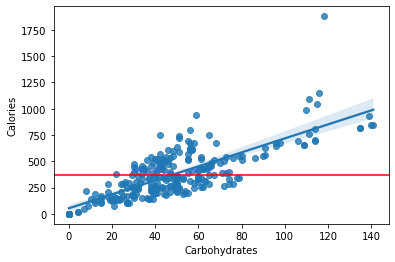

In [4]:
#Regplot but with seaborn, easier way but does not return the function (p)
sns.regplot(data=df, x='Carbohydrates', y='Calories')
plt.xlabel('Carbohydrates')
plt.ylabel('Calories')
avgline = df['Calories'].mean()
plt.axhline(y=avgline, color='r')

Text(0.5, 0, 'Vitamins (A & C) in mean % of Daily Value')

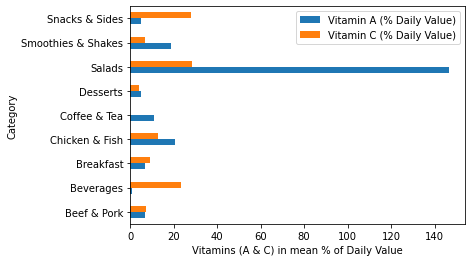

In [5]:
#Vitamins by category
vitamins = ['Category', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)']
df[vitamins].groupby('Category').mean().plot.barh()
plt.xlabel(r'Vitamins (A & C) in mean % of Daily Value')


#All Data is packed up due to the predominance of Salads. Said category offers - on average - 140% of daily value of Vitamin A. 
#It is advisable to analyse data without Salads to better understand the other categories

In [6]:
#Dropping salads
df_nosalad = df[df['Category'].str.contains('Salads') == False]
df_nosalad['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Snacks & Sides',
       'Desserts', 'Beverages', 'Coffee & Tea', 'Smoothies & Shakes'],
      dtype=object)

Text(0.5, 0, 'Vitamins (A & C) in mean % of Daily Value')

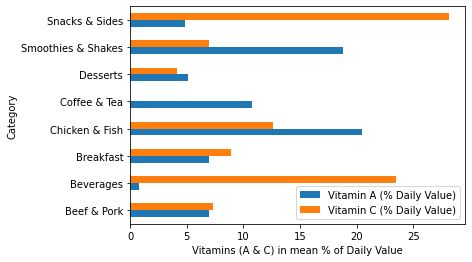

In [7]:
#Vitamins by category (no salads)
df_nosalad[vitamins].groupby('Category').mean().plot.barh()
plt.xlabel(r'Vitamins (A & C) in mean % of Daily Value')

#Snacks & Sides have the highest Vitamin C mean percentage.
#Whereas the first rank concerning Vitamin A appears to be disputed between Chicken & Fish and Smoothies & Shakes.
#The most balanced category is Beef & Pork (only a .5 differential between the two vitamins' figures).
#The least balanced category is Beverages (nearly as much Vitamin C as S&S but nearly no Vitamin A at all).

<AxesSubplot:ylabel='Item'>

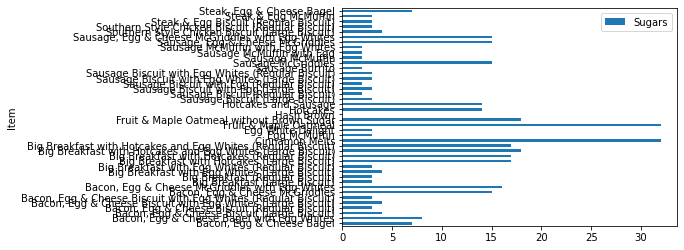

In [8]:
#Creating different dfs depending on category
breakfast = df[df['Category'] == 'Breakfast']

Beef_Pork = df[df['Category'] == 'Beef & Pork']

Chicken_Fish = df[df['Category'] == 'Chicken & Fish']

Salads = df[df['Category'] == 'Salads']

Snacks_Sides = df[df['Category'] == 'Snacks & Sides']

Desserts = df[df['Category'] == 'Desserts']

Beverages = df[df['Category'] == 'Beverages']

Coffee_Tea = df[df['Category'] == 'Coffee & Tea']

Smoothies_Shakes = df[df['Category'] == 'Smoothies & Shakes']

#Plot by category sugars on item
sugar_item = ['Item', 'Sugars']
breakfast[sugar_item].groupby('Item').mean().plot.barh()

Text(0, 0.5, 'Level of Sugar')

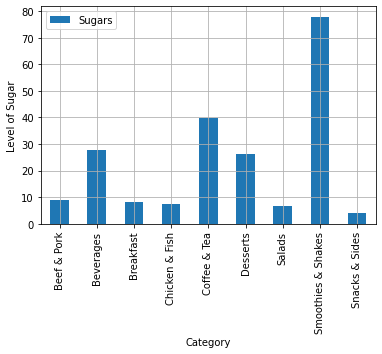

In [9]:
#Sugars' level by category
sc = ['Category', 'Sugars']
df[sc].groupby('Category').mean().plot.bar().grid()
plt.ylabel('Level of Sugar')
#plt.yticks(np.arange(0, 80, 5.0))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Breakfast'),
  Text(1, 0, 'Beef & Pork'),
  Text(2, 0, 'Chicken & Fish'),
  Text(3, 0, 'Salads'),
  Text(4, 0, 'Snacks & Sides'),
  Text(5, 0, 'Desserts'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Coffee & Tea'),
  Text(8, 0, 'Smoothies & Shakes')])

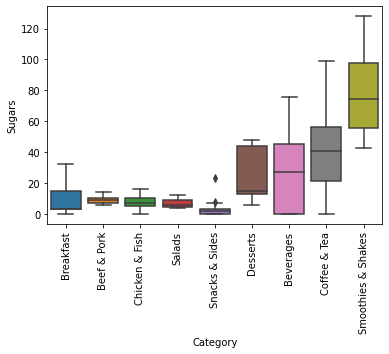

In [10]:
#Sugars by category boxplot to underline outliers
ax = sns.boxplot(x='Category', y='Sugars', data=df)
plt.xticks(rotation=90)


#It appears 'Snacks & Sides' has an important outlier

In [11]:
#Selecting snacks & sides and sorting by sugars
df[df['Category'] == 'Snacks & Sides'].sort_values(by='Sugars', ascending=False)


#The outlier is "Fruit 'n Yogurt Parfait" with 23 sugars (when rank 2 - which is the Chipotle BBQ Snack Wrap (that we all sadly miss) - has only 8)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
102,Snacks & Sides,Fruit 'n Yogurt Parfait,5.2 oz (149 g),150,20,2.0,3,1.0,5,0.0,...,30,10,1,3,23,4,2,15,10,4
90,Snacks & Sides,Chipotle BBQ Snack Wrap (Crispy Chicken),4.6 oz (130 g),340,130,15.0,23,4.5,22,0.0,...,37,12,1,6,8,14,4,0,10,10
91,Snacks & Sides,Chipotle BBQ Snack Wrap (Grilled Chicken),4.3 oz (123 g),260,70,8.0,13,3.5,18,0.0,...,30,10,1,6,7,16,4,2,10,10
92,Snacks & Sides,Honey Mustard Snack Wrap (Crispy Chicken),4.3 oz (123 g),330,130,15.0,23,4.5,22,0.0,...,34,11,1,5,3,14,2,0,10,10
94,Snacks & Sides,Ranch Snack Wrap (Crispy Chicken),4.5 oz (128 g),360,180,20.0,30,5.0,27,0.0,...,32,11,1,5,3,15,2,0,10,10
101,Snacks & Sides,Apple Slices,1.2 oz (34 g),15,0,0.0,0,0.0,0,0.0,...,4,1,0,0,3,0,0,160,2,0
93,Snacks & Sides,Honey Mustard Snack Wrap (Grilled Chicken),4.1 oz (116 g),250,70,8.0,13,3.5,18,0.0,...,27,9,1,5,2,16,2,2,10,10
95,Snacks & Sides,Ranch Snack Wrap (Grilled Chicken),4.3 oz (121 g),280,120,13.0,20,4.5,22,0.0,...,25,8,1,5,2,16,2,2,10,10
100,Snacks & Sides,Side Salad,3.1 oz (87 g),20,0,0.0,0,0.0,0,0.0,...,4,1,1,6,2,1,45,25,2,4
96,Snacks & Sides,Small French Fries,2.6 oz (75 g),230,100,11.0,17,1.5,8,0.0,...,30,10,2,10,0,2,0,30,0,4


<AxesSubplot:xlabel='Item'>

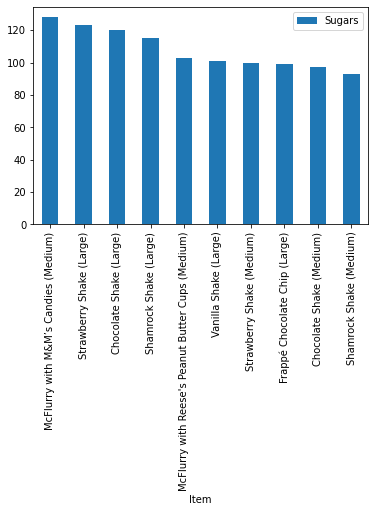

In [12]:
#Plotting top 10 items by sugar level
df.sort_values(by='Sugars', ascending=False).iloc[:10, :].plot.bar(x="Item", y="Sugars")



#And it's obviously all Smoothies or Shakes

<AxesSubplot:ylabel='Sugars'>

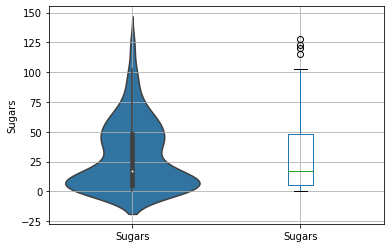

In [13]:
sns.violinplot(y='Sugars', data=df)
df.boxplot(column='Sugars')

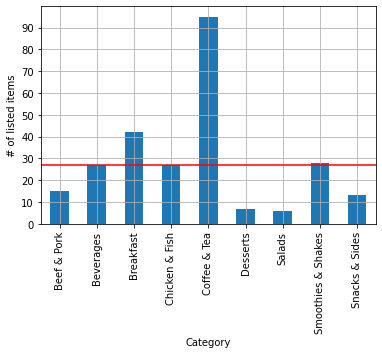

In [14]:
#Number of items grouped by category
df.groupby('Category')['Item'].nunique().plot.bar()
plt.ylabel('# of listed items')
medianline = df.groupby('Category')['Item'].nunique().median()
plt.axhline(y=medianline, color='r')
plt.yticks(np.arange(0, 100, 10.0))
plt.grid()